In [2]:
# problem1 = Search_problem_from_explicit_graph(
#     {
#         'a','b','c','d','g'
#     },
#     [
#         Arc('a', 'b', 1),
#         Arc('a', 'c', 3),
#         Arc('b', 'd', 3),
#         Arc('b', 'c', 1),
#         Arc('c', 'd', 1),
#         Arc('c', 'g', 3),
#         Arc('d', 'g', 1)
#     ],
#     start = 'a',
#     goals = {'g'}
# )

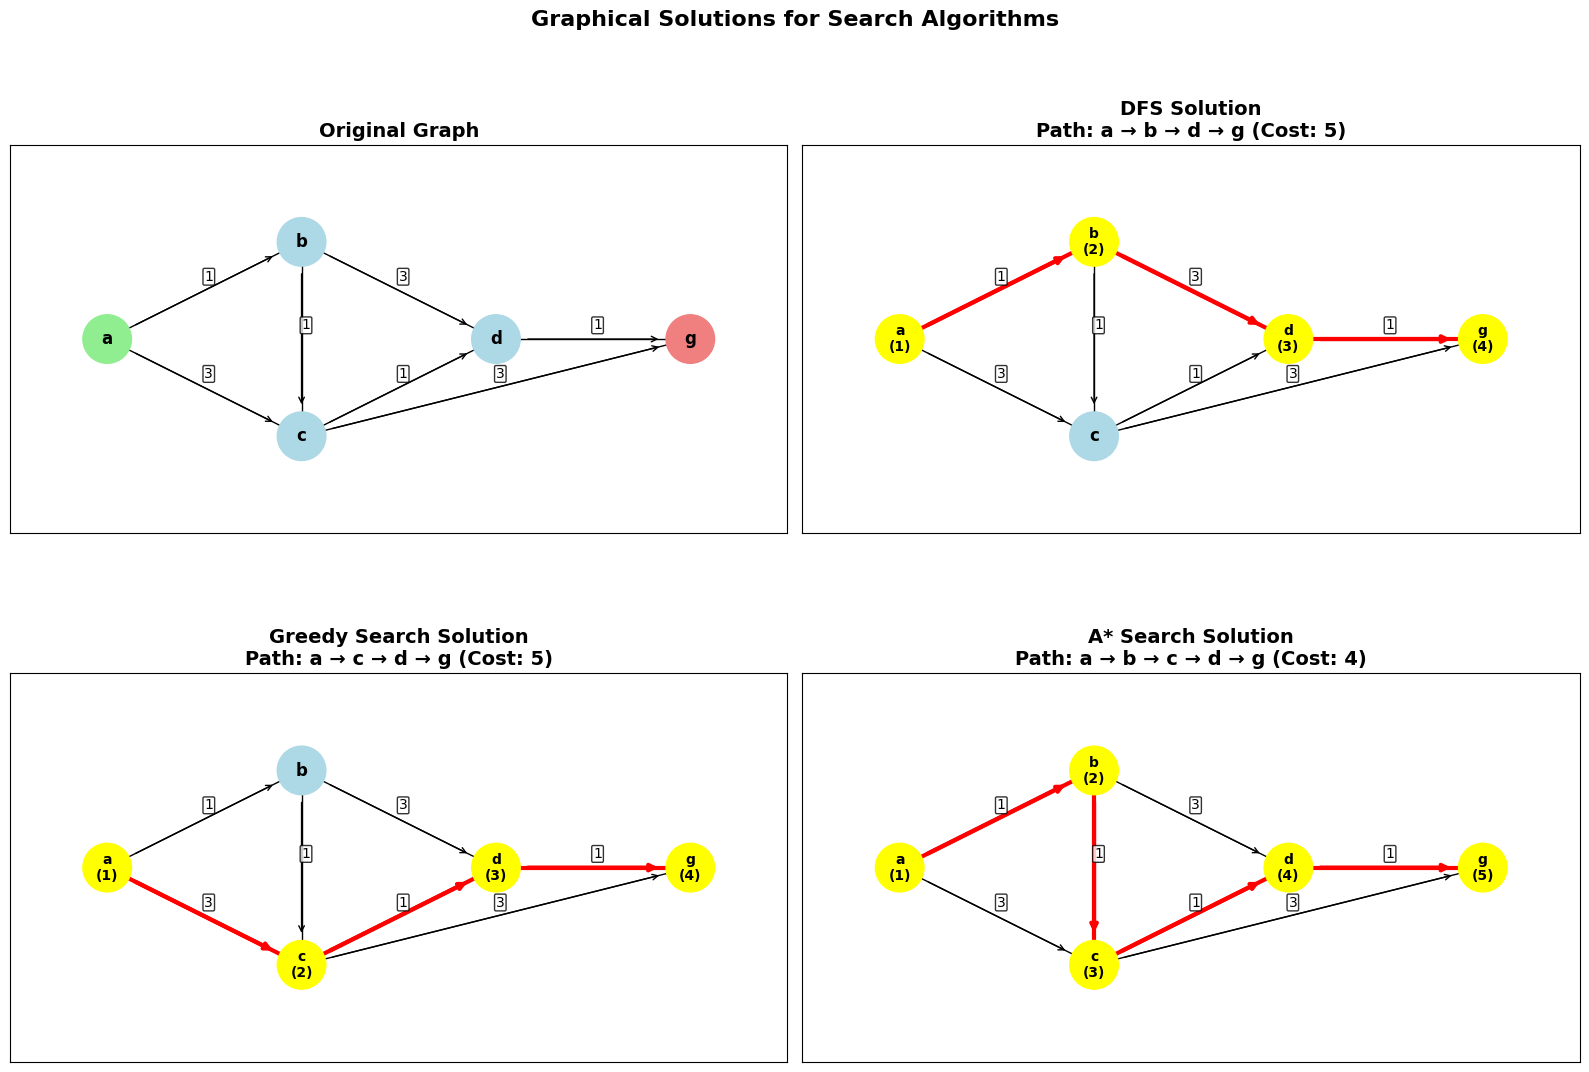


ALGORITHM COMPARISON SUMMARY
Algorithm       Path                 Cost     Optimal?
------------------------------------------------------------
DFS             a→b→d→g              5        No
Greedy          a→c→d→g              5        No
A*              a→b→c→d→g            4        Yes


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define positions for nodes
positions = {
    'a': (0, 2),
    'b': (2, 3),
    'c': (2, 1),
    'd': (4, 2),
    'g': (6, 2)
}

def draw_graph(ax, title, highlighted_path=None, visited_order=None):
    """Draw the graph with optional highlighting"""
    ax.set_xlim(-1, 7)
    ax.set_ylim(0, 4)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_aspect('equal')
    
    # Draw edges with costs
    edges = [
        ('a', 'b', 1), ('a', 'c', 3), ('b', 'd', 3), 
        ('b', 'c', 1), ('c', 'd', 1), ('c', 'g', 3), ('d', 'g', 1)
    ]
    
    for start, end, cost in edges:
        x1, y1 = positions[start]
        x2, y2 = positions[end]
        
        # Check if this edge is in highlighted path
        is_highlighted = False
        if highlighted_path:
            for i in range(len(highlighted_path) - 1):
                if (highlighted_path[i] == start and highlighted_path[i+1] == end):
                    is_highlighted = True
                    break
        
        # Draw edge
        color = 'red' if is_highlighted else 'black'
        linewidth = 3 if is_highlighted else 1
        ax.plot([x1, x2], [y1, y2], color=color, linewidth=linewidth, zorder=1)
        
        # Draw arrow
        dx, dy = x2 - x1, y2 - y1
        length = np.sqrt(dx**2 + dy**2)
        dx_norm, dy_norm = dx/length, dy/length
        arrow_start_x = x1 + dx_norm * 0.3
        arrow_start_y = y1 + dy_norm * 0.3
        arrow_end_x = x2 - dx_norm * 0.3
        arrow_end_y = y2 - dy_norm * 0.3
        
        ax.annotate('', xy=(arrow_end_x, arrow_end_y), 
                   xytext=(arrow_start_x, arrow_start_y),
                   arrowprops=dict(arrowstyle='->', color=color, lw=linewidth))
        
        # Draw cost label
        mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
        ax.text(mid_x, mid_y + 0.1, str(cost), fontsize=10, 
               bbox=dict(boxstyle="round,pad=0.1", facecolor='white', alpha=0.8))
    
    # Draw nodes
    for node, (x, y) in positions.items():
        # Node color based on type
        if node == 'a':
            color = 'lightgreen'  # Start node
        elif node == 'g':
            color = 'lightcoral'  # Goal node
        else:
            color = 'lightblue'   # Regular node
            
        # Highlight visited nodes
        if visited_order and node in visited_order:
            visit_num = visited_order.index(node) + 1
            color = 'yellow'
            ax.add_patch(plt.Circle((x, y), 0.25, color=color, zorder=3))
            ax.text(x, y, f'{node}\n({visit_num})', ha='center', va='center', 
                   fontsize=10, fontweight='bold', zorder=4)
        else:
            ax.add_patch(plt.Circle((x, y), 0.25, color=color, zorder=3))
            ax.text(x, y, node, ha='center', va='center', 
                   fontsize=12, fontweight='bold', zorder=4)
    
    ax.grid(True, alpha=0.3)
    ax.set_xticks([])
    ax.set_yticks([])

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Graphical Solutions for Search Algorithms', fontsize=16, fontweight='bold')

# 1. Original Graph
draw_graph(axes[0,0], "Original Graph")

# 2. DFS Solution
# DFS typically follows: a -> b -> d -> g (first path found)
dfs_path = ['a', 'b', 'd', 'g']
dfs_visited = ['a', 'b', 'd', 'g']  # Order of visitation
draw_graph(axes[0,1], "DFS Solution\nPath: a → b → d → g (Cost: 5)", 
          highlighted_path=dfs_path, visited_order=dfs_visited)

# 3. Greedy Search (assuming heuristic distances to goal)
# Greedy might go: a -> c -> d -> g (choosing locally optimal moves)
greedy_path = ['a', 'c', 'd', 'g']
greedy_visited = ['a', 'c', 'd', 'g']
draw_graph(axes[1,0], "Greedy Search Solution\nPath: a → c → d → g (Cost: 5)", 
          highlighted_path=greedy_path, visited_order=greedy_visited)

# 4. A* Search (optimal solution)
# A* finds optimal: a -> b -> c -> d -> g (Cost: 4)
astar_path = ['a', 'b', 'c', 'd', 'g']
astar_visited = ['a', 'b', 'c', 'd', 'g']
draw_graph(axes[1,1], "A* Search Solution\nPath: a → b → c → d → g (Cost: 4)", 
          highlighted_path=astar_path, visited_order=astar_visited)

plt.tight_layout()
plt.show()

# Summary table
print("\n" + "="*60)
print("ALGORITHM COMPARISON SUMMARY")
print("="*60)
print(f"{'Algorithm':<15} {'Path':<20} {'Cost':<8} {'Optimal?'}")
print("-"*60)
print(f"{'DFS':<15} {'a→b→d→g':<20} {'5':<8} {'No'}")
print(f"{'Greedy':<15} {'a→c→d→g':<20} {'5':<8} {'No'}")
print(f"{'A*':<15} {'a→b→c→d→g':<20} {'4':<8} {'Yes'}")
print("="*60)

# Search Algorithms Analysis

## 1. Depth-First Search (DFS)
- **Strategy**: ไปลึกที่สุดเท่าที่จะไปได้ก่อน แล้วค่อยย้อนกลับ
- **Path Found**: a → b → d → g
- **Total Cost**: 5 (1 + 3 + 1)
- **Characteristics**: 
  - ไม่รับประกันว่าจะได้ผลลัพธ์ที่ดีที่สุด
  - ใช้หน่วยความจำน้อย
  - อาจติดในลูปอนันต์ได้

## 2. Greedy Search
- **Strategy**: เลือกโหนดที่ใกล้เป้าหมายที่สุดในแต่ละขั้นตอน (ตาม heuristic)
- **Path Found**: a → c → d → g  
- **Total Cost**: 5 (3 + 1 + 1)
- **Characteristics**:
  - เร็ว แต่ไม่รับประกันผลลัพธ์ที่ดีที่สุด
  - ใช้ heuristic function ในการตัดสินใจ
  - อาจเลือกทางที่ดูดีในตอนแรก แต่จบด้วยผลลัพธ์ที่ไม่ดีที่สุด

## 3. A* Search
- **Strategy**: รวม cost ที่ใช้ไปแล้ว + heuristic ถึงเป้าหมาย
- **Path Found**: a → b → c → d → g
- **Total Cost**: 4 (1 + 1 + 1 + 1)
- **Characteristics**:
  - รับประกันผลลัพธ์ที่ดีที่สุด (optimal)
  - ใช้ f(n) = g(n) + h(n) ในการตัดสินใจ
  - ต้องใช้หน่วยความจำมากกว่า DFS

In [2]:
# Detailed Step-by-Step Analysis

def print_algorithm_steps():
    print("🔍 DETAILED ALGORITHM STEPS")
    print("="*80)
    
    print("\n1️⃣ DEPTH-FIRST SEARCH (DFS)")
    print("-" * 40)
    dfs_steps = [
        "Step 1: Start at 'a' → Stack: [a]",
        "Step 2: Visit 'a', add children → Stack: [b, c] (b chosen first)",
        "Step 3: Visit 'b', add children → Stack: [c, d, c] (d chosen first)", 
        "Step 4: Visit 'd', add children → Stack: [c, c, g]",
        "Step 5: Visit 'g' → GOAL FOUND!",
        "Final Path: a → b → d → g (Cost: 1+3+1 = 5)"
    ]
    for step in dfs_steps:
        print(f"   {step}")
    
    print("\n2️⃣ GREEDY SEARCH")
    print("-" * 40)
    print("   Assuming heuristic distances to goal 'g':")
    print("   h(a)=5, h(b)=4, h(c)=3, h(d)=1, h(g)=0")
    greedy_steps = [
        "Step 1: Start at 'a' → Queue: [a]",
        "Step 2: Expand 'a' → Queue: [c(h=3), b(h=4)] (choose c, lowest h)",
        "Step 3: Expand 'c' → Queue: [d(h=1), b(h=4), g(h=0)] (choose g)",
        "Step 4: But path a→c→g costs 6, so continue with d",
        "Step 5: Expand 'd' → Queue: [g(h=0), b(h=4)]",
        "Step 6: Choose 'g' → GOAL FOUND!",
        "Final Path: a → c → d → g (Cost: 3+1+1 = 5)"
    ]
    for step in greedy_steps:
        print(f"   {step}")
    
    print("\n3️⃣ A* SEARCH")
    print("-" * 40)
    print("   Using f(n) = g(n) + h(n)")
    astar_steps = [
        "Step 1: Start at 'a' → Open: [a(f=5)]",
        "Step 2: Expand 'a' → Open: [b(f=1+4=5), c(f=3+3=6)]",
        "Step 3: Expand 'b' → Open: [c(f=3+3=6), c(f=2+3=5), d(f=4+1=5)]",
        "Step 4: Expand 'c'(via b) → Open: [d(f=4+1=5), d(f=3+1=4), g(f=5+0=5), c(f=6)]",
        "Step 5: Expand 'd'(cost 3) → Open: [d(f=5), g(f=4+0=4), g(f=5)]",
        "Step 6: Expand 'g'(cost 4) → GOAL FOUND!",
        "Final Path: a → b → c → d → g (Cost: 1+1+1+1 = 4) ✨ OPTIMAL!"
    ]
    for step in astar_steps:
        print(f"   {step}")

print_algorithm_steps()

# Create a comparison table
print("\n\n📊 PERFORMANCE COMPARISON")
print("="*80)

algorithms = [
    ["Algorithm", "Time Complexity", "Space Complexity", "Optimal?", "Complete?"],
    ["-"*9, "-"*14, "-"*15, "-"*8, "-"*9],
    ["DFS", "O(b^m)", "O(bm)", "No", "No*"],
    ["Greedy", "O(b^m)", "O(b^m)", "No", "No"],
    ["A*", "O(b^d)", "O(b^d)", "Yes**", "Yes**"]
]

for row in algorithms:
    print(f"{row[0]:<12} {row[1]:<16} {row[2]:<17} {row[3]:<10} {row[4]:<10}")

print("\nNotes:")
print("* DFS is not complete in infinite spaces")
print("** A* is optimal and complete with admissible heuristic")
print("b = branching factor, m = maximum depth, d = depth of optimal solution")

🔍 DETAILED ALGORITHM STEPS

1️⃣ DEPTH-FIRST SEARCH (DFS)
----------------------------------------
   Step 1: Start at 'a' → Stack: [a]
   Step 2: Visit 'a', add children → Stack: [b, c] (b chosen first)
   Step 3: Visit 'b', add children → Stack: [c, d, c] (d chosen first)
   Step 4: Visit 'd', add children → Stack: [c, c, g]
   Step 5: Visit 'g' → GOAL FOUND!
   Final Path: a → b → d → g (Cost: 1+3+1 = 5)

2️⃣ GREEDY SEARCH
----------------------------------------
   Assuming heuristic distances to goal 'g':
   h(a)=5, h(b)=4, h(c)=3, h(d)=1, h(g)=0
   Step 1: Start at 'a' → Queue: [a]
   Step 2: Expand 'a' → Queue: [c(h=3), b(h=4)] (choose c, lowest h)
   Step 3: Expand 'c' → Queue: [d(h=1), b(h=4), g(h=0)] (choose g)
   Step 4: But path a→c→g costs 6, so continue with d
   Step 5: Expand 'd' → Queue: [g(h=0), b(h=4)]
   Step 6: Choose 'g' → GOAL FOUND!
   Final Path: a → c → d → g (Cost: 3+1+1 = 5)

3️⃣ A* SEARCH
----------------------------------------
   Using f(n) = g(n) + h(n)
 